In [23]:
from pandas import read_csv
from pandas import DataFrame
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pandas import Series
from pandas.plotting import autocorrelation_plot
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters 
register_matplotlib_converters()
from math import sqrt
from sklearn.metrics import mean_squared_error
import warnings

In [89]:
# Importer la bibliothèque pandas
import pandas as pd

# Charger le fichier Excel modifié
file_path_modifie = "C:\\Users\\hp\\Desktop\\timess\\masi.xlsx"
df_modifie = pd.read_excel(file_path_modifie, header=0, index_col=0,parse_dates=True)

# Afficher les premières lignes du DataFrame importé
df_modifie.head()


,Cous de cloture
Date,
2023-12-08,11885.32
2023-12-07,11827.02
2023-12-06,11757.60
2023-12-05,11759.51
2023-12-04,11728.06


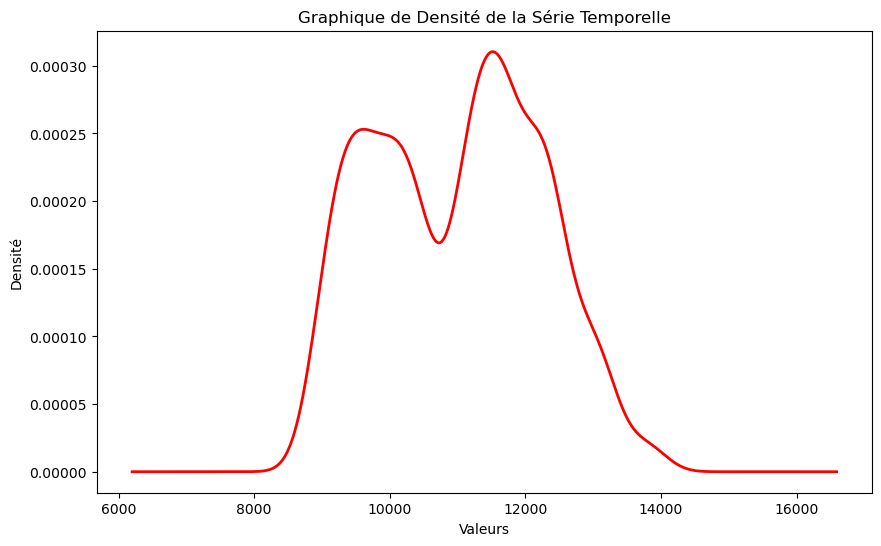

In [56]:

# Charger la série temporelle
serie_temporelle = df_modifie['Cous de cloture']
# Tracer un graphique de densité
plt.figure(figsize=(10, 6))
serie_temporelle.plot(kind='kde', color='red', linewidth=2)
plt.title('Graphique de Densité de la Série Temporelle')
plt.xlabel('Valeurs')
plt.ylabel('Densité')
plt.show()

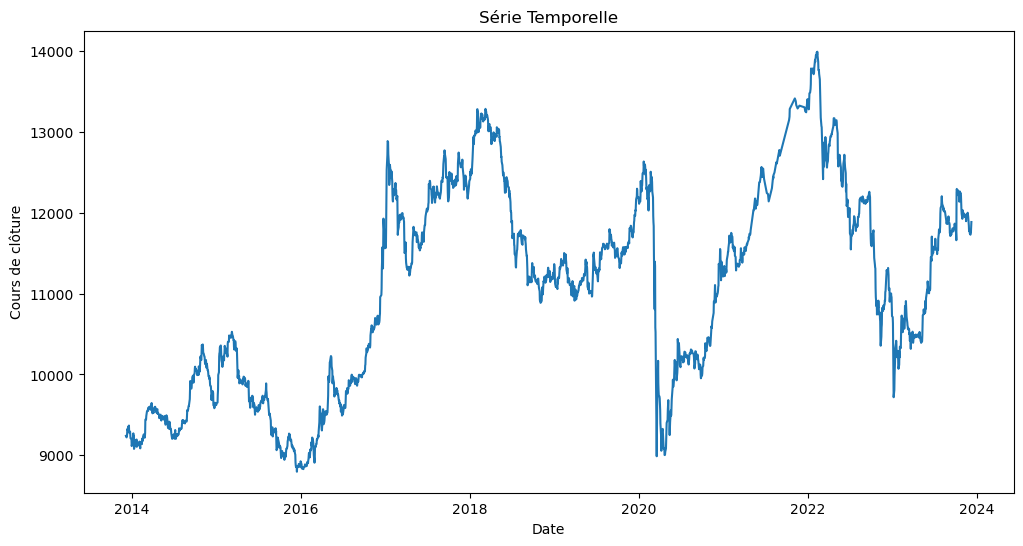

In [26]:
# Charger la série temporelle
serie_temporelle = df_modifie['Cous de cloture']

# Visualiser la série temporelle
plt.figure(figsize=(12, 6))
plt.plot(serie_temporelle)
plt.title('Série Temporelle')
plt.xlabel('Date')
plt.ylabel('Cours de clôture')
plt.show()

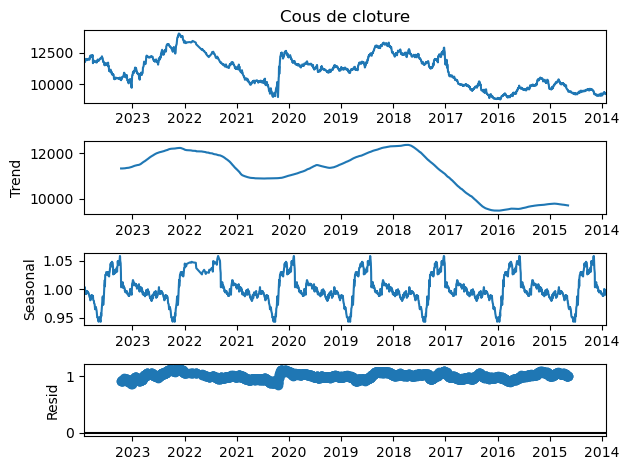

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Supposons que 'Cous de cloture' est la colonne de votre série temporelle
# 'df_modifie' est votre DataFrame
serie_temporelle = df_modifie['Cous de cloture']

# Utiliser seasonal_decompose pour décomposer la série temporelle
result = seasonal_decompose(serie_temporelle, model='multiplicative', period=356)

# Afficher les composants décomposés
result.plot()
plt.show()


In [33]:
# Extraire la colonne 'Cous de cloture'
cous_de_cloture = df_modifie['Cous de cloture']

# Effectuer le test de Dickey-Fuller
result = adfuller(cous_de_cloture)

# Afficher les résultats du test
print('Statistique de test :', result[0])
print('Valeur critique (à 1%, 5% et 10%) :', result[4])
print('P-value :', result[1])

# Interprétation des résultats
p_value = result[1]
if p_value <= 0.05:
    print("La série temporelle est stationnaire (rejeter l'hypothèse nulle)")
else:
    print("La série temporelle n'est pas stationnaire (ne pas rejeter l'hypothèse nulle)")

Statistique de test : -2.0390766544816343
Valeur critique (à 1%, 5% et 10%) : {'1%': -3.43313335512918, '5%': -2.8627696375034364, '10%': -2.567424589414422}
P-value : 0.26970641736113127
La série temporelle n'est pas stationnaire (ne pas rejeter l'hypothèse nulle)


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Coefficients: const                 15.073993
Cous de cloture.L1     0.998499
dtype: float64


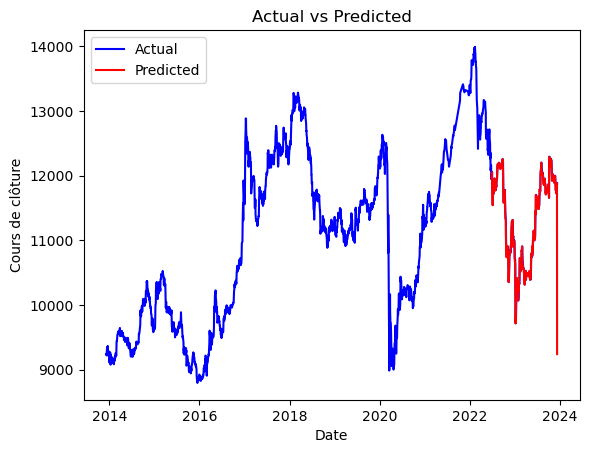

In [110]:
import matplotlib.pyplot as plt

# Assuming you have 'train' and 'test' datasets
test = series.iloc[:-2000]  # Utiliser 365 pour prendre en compte une année de données comme entraînement
train = series.iloc[-2000:]   # Utiliser 365 pour prendre en compte une année de données comme test

# Reste du code reste inchangé
lags = 2
model = AutoReg(train, lags=lags)
model_fit = model.fit()

coef = model_fit.params
print('Coefficients: %s' % coef)

def predict(coefs, history, lags, X):
    predictions = []

    for k in range(len(X)):
        lag = [history[i] for i in range(len(history) - lags, len(history))]
        yhat = coefs[0]

        for j in range(lags):
            yhat += lag[j] * coefs[lags - j]

        predictions.append(yhat)
        history.append(X[k])

    return predictions

predictions = predict(coef, train.tolist(), lags, test.tolist())

predictions_df = pd.DataFrame(predictions, index=test.index, columns=['Predictions'])

# Plot the actual and predicted values
plt.plot(series.index, series, label='Actual', color='blue')
plt.plot(predictions_df.index, predictions_df['Predictions'], label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Cours de clôture')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

# Reste du code pour afficher les prédictions et le RMSE


In [111]:
# Afficher les prédictions
for idx in predictions_df.index:
    timestamp_idx = Timestamp(idx)
    print('Date: %s, Predicted: %f' % (timestamp_idx, predictions_df.loc[timestamp_idx, 'Predictions']))

# Calculer et afficher le RMSE
rmse = sqrt(mean_squared_error(test, predictions_df))
print('Test RMSE: %.3f' % rmse)


Date: 2023-12-08 00:00:00, Predicted: 9241.617141
Date: 2023-12-07 00:00:00, Predicted: 11882.557991
Date: 2023-12-06 00:00:00, Predicted: 11824.345481
Date: 2023-12-05 00:00:00, Predicted: 11755.029657
Date: 2023-12-04 00:00:00, Predicted: 11756.936791
Date: 2023-12-01 00:00:00, Predicted: 11725.533987
Date: 2023-11-30 00:00:00, Predicted: 11745.633779
Date: 2023-11-29 00:00:00, Predicted: 11778.953701
Date: 2023-11-28 00:00:00, Predicted: 11781.719544
Date: 2023-11-27 00:00:00, Predicted: 11772.573291
Date: 2023-11-24 00:00:00, Predicted: 11841.090314
Date: 2023-11-23 00:00:00, Predicted: 11954.799417
Date: 2023-11-22 00:00:00, Predicted: 11973.271655
Date: 2023-11-21 00:00:00, Predicted: 11996.776329
Date: 2023-11-20 00:00:00, Predicted: 11973.341550
Date: 2023-11-17 00:00:00, Predicted: 11976.566703
Date: 2023-11-16 00:00:00, Predicted: 11944.704589
Date: 2023-11-15 00:00:00, Predicted: 11967.021049
Date: 2023-11-14 00:00:00, Predicted: 11892.712729
Date: 2023-11-13 00:00:00, Predi

In [112]:
from pandas import DataFrame, concat
from statsmodels.tsa.ar_model import AutoReg
from math import sqrt
from sklearn.metrics import mean_squared_error

# Créer un DataFrame à partir de la série temporelle
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

# Diviser en ensembles d'entraînement et de test
X = dataframe.values
train_size = 2000
train, test = X[1:train_size], X[train_size:2000]
train_X, train_y = train[:, 0], train[:, 1]
test_X, test_y = test[:, 0], test[:, 1]

# Modèle de persistance sur l'ensemble d'entraînement
train_pred = [x for x in train_X]

# Calculer les résidus
train_resid = [train_y[i] - train_pred[i] for i in range(len(train_pred))]

# Paramètres du modèle AutoReg sur les résidus
window = 2
model = AutoReg(train_resid, lags=window)
model_fit = model.fit()
coef = model_fit.params

# Historique initial
history = train_resid[len(train_resid)-window:]

# Prédiction et correction sur l'ensemble de test
predictions = []

for j in range(len(test_y)):
    yhat = test_X[j]  # persistance
    error = test_y[j] - yhat

    lags = [history[h] for h in range(len(history)-window, len(history))]
    predicted_error = coef[0]

    for k in range(window):
        predicted_error += lags[k] * coef[window-k]

    yhat = yhat + predicted_error  # correction des prédictions
    predictions.append(yhat)
    history.append(error)

# Afficher les prédictions
for j in range(len(predictions)):
    print('t+%d, Predicted: %f' % (j+1, predictions[j]))

# Calculer et afficher le RMSE
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)


t+1, Predicted: 12013.686769
t+2, Predicted: 12044.353441
t+3, Predicted: 12034.485486
t+4, Predicted: 11937.913868
t+5, Predicted: 11982.620081
t+6, Predicted: 12057.733583
t+7, Predicted: 12151.005214
t+8, Predicted: 12231.953801
t+9, Predicted: 12257.276879
t+10, Predicted: 12248.224295
t+11, Predicted: 12269.680067
t+12, Predicted: 12265.487622
t+13, Predicted: 12149.417532
t+14, Predicted: 12186.031271
t+15, Predicted: 12259.730160
Test RMSE: 58.421


C:\Users\hp\AppData\Local\Temp\ipykernel_20372\3768898688.py:10: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_excel(file_path_modifie, header=0, index_col=0, parse_dates=True, squeeze=True)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecas

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2363
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -13801.703
Date:                Sat, 27 Jan 2024   AIC                          27615.406
Time:                        17:16:14   BIC                          27650.010
Sample:                             0   HQIC                         27628.005
                               - 2363                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8334      0.008   -107.211      0.000      -0.849      -0.818
ar.L2         -0.6669      0.010    -66.315      0.000      -0.687      -0.647
ar.L3         -0.4773      0.013    -35.656      0.0

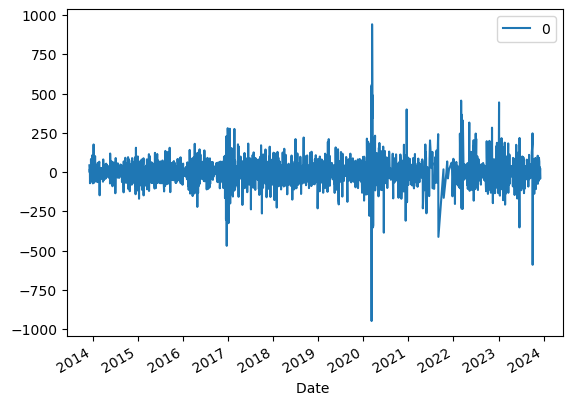

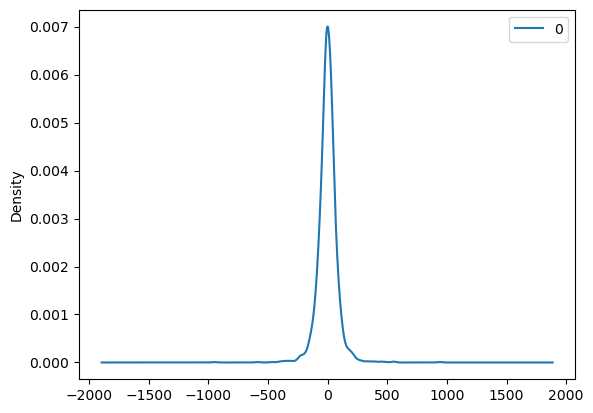

                 0
count  2363.000000
mean     -0.024113
std      83.439075
min    -948.656072
25%     -37.254309
50%      -0.450210
75%      37.549461
max     941.141888


In [113]:
from pandas import read_excel, DataFrame
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Charger la série temporelle
file_path_modifie = "C:\\Users\\hp\\Desktop\\timess\\masi.xlsx"
series = read_excel(file_path_modifie, header=0, index_col=0, parse_dates=True, squeeze=True)

# Fit AutoReg model pour les résidus
lags_auto_reg = 3
model_auto_reg = AutoReg(series, lags=lags_auto_reg)
model_auto_reg_fit = model_auto_reg.fit()
residuals_auto_reg = model_auto_reg_fit.resid

# fit an ARIMA model and plot residual errors
order_arima = (5, 1, 0)
model_arima = ARIMA(residuals_auto_reg, order=order_arima)
model_arima_fit = model_arima.fit()

# Résumé du modèle ajusté
print(model_arima_fit.summary())

# Résidus
residuals_arima = DataFrame(model_arima_fit.resid)
residuals_arima.plot()
plt.show()

# Density plot des résidus
residuals_arima.plot(kind='kde')
plt.show()

# Statistiques descriptives des résidus
print(residuals_arima.describe())


In [ ]:
from pandas import read_excel
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
from sklearn.metrics import mean_squared_error
import warnings

# Charger la série temporelle depuis le fichier Excel
file_path_modifie = "C:\\Users\\hp\\Desktop\\timess\\masi.xlsx"
series = read_excel(file_path_modifie, header=0, index_col=0, parse_dates=True, squeeze=True)

# Évaluer un modèle ARIMA pour une commande donnée (p, d, q)
def evaluate_arima_model(X, arima_order):
    # Préparer l'ensemble de données d'entraînement
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    
    # Faire des prédictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    
    # Calculer l'erreur hors échantillon (RMSE)
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# Ignorer les avertissements pour une meilleure lisibilité
warnings.filterwarnings("ignore")

# Évaluer les combinaisons de valeurs p, d et q pour un ARIMA
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order, rmse))
                except:
                    continue
    
    print('Meilleur ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# Paramètres pour p, d et q à évaluer
p_values = range(0, 6)
d_values = range(0, 3)
q_values = range(0, 6)

# Évaluer les modèles
evaluate_models(series, p_values, d_values, q_values)


C:\Users\hp\AppData\Local\Temp\ipykernel_20372\3683698.py:9: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_excel(file_path_modifie, header=0, index_col=0, parse_dates=True, squeeze=True)


ARIMA(0, 0, 0) RMSE=1656.309
ARIMA(0, 0, 1) RMSE=849.331
ARIMA(0, 0, 2) RMSE=506.430
ARIMA(0, 0, 3) RMSE=434.259
ARIMA(0, 0, 4) RMSE=451.640
ARIMA(0, 0, 5) RMSE=348.681
ARIMA(0, 1, 0) RMSE=60.404
ARIMA(0, 1, 1) RMSE=59.377
ARIMA(0, 1, 2) RMSE=59.368
ARIMA(0, 1, 3) RMSE=59.436
ARIMA(0, 1, 4) RMSE=59.571
ARIMA(0, 1, 5) RMSE=59.548
ARIMA(0, 2, 0) RMSE=76.365
ARIMA(0, 2, 1) RMSE=60.498
ARIMA(0, 2, 2) RMSE=59.369
ARIMA(0, 2, 3) RMSE=59.364
ARIMA(0, 2, 4) RMSE=59.431
ARIMA(0, 2, 5) RMSE=59.568
ARIMA(1, 0, 0) RMSE=60.707
ARIMA(1, 0, 1) RMSE=59.691
ARIMA(1, 0, 2) RMSE=59.661
ARIMA(1, 0, 3) RMSE=59.754
ARIMA(1, 0, 4) RMSE=59.876
ARIMA(1, 0, 5) RMSE=59.863
ARIMA(1, 1, 0) RMSE=59.288
ARIMA(1, 1, 1) RMSE=59.322
ARIMA(1, 1, 2) RMSE=59.380
ARIMA(1, 1, 3) RMSE=59.419
ARIMA(1, 1, 4) RMSE=59.475
ARIMA(1, 1, 5) RMSE=59.499
ARIMA(1, 2, 0) RMSE=69.814
ARIMA(1, 2, 1) RMSE=59.279
ARIMA(1, 2, 2) RMSE=59.318
ARIMA(1, 2, 3) RMSE=59.476
ARIMA(1, 2, 4) RMSE=59.412
ARIMA(1, 2, 5) RMSE=59.473
ARIMA(2, 0, 0) RMSE=5

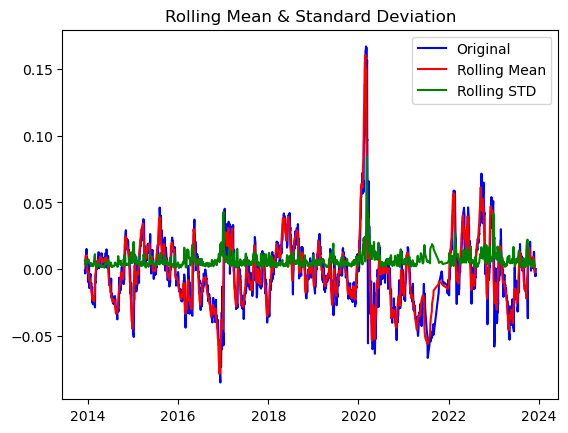

ADF Statistic: -6.951820201225872
p value: 9.649101745513922e-10
Critical Values:
	1%: -3.4331357265371256
	5%: -2.8627706846606245
	10%: -2.5674251469443186


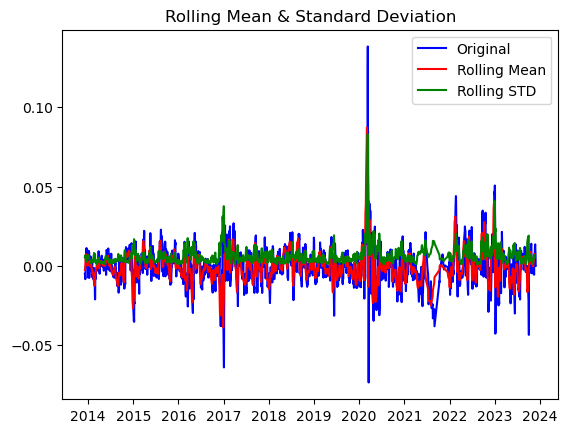

ADF Statistic: -10.151321949869919
p value: 7.937120625601674e-18
Critical Values:
	1%: -3.4331392912353604
	5%: -2.8627722587447804
	10%: -2.5674259850221723


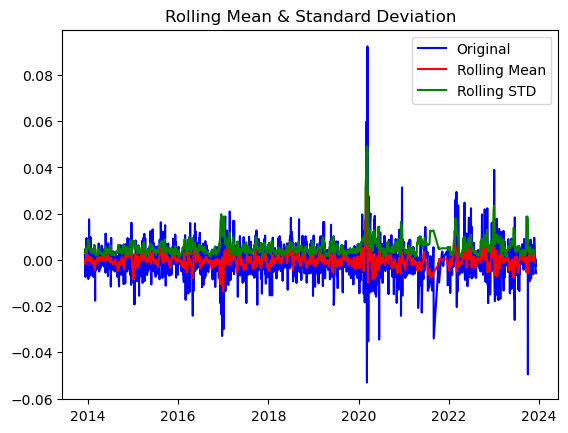

ADF Statistic: -11.821123851759744
p value: 8.409839278404556e-22
Critical Values:
	1%: -3.43313335512918
	5%: -2.8627696375034364
	10%: -2.567424589414422


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Extraire la colonne 'Cous de cloture'
cous_de_cloture = df_modifie['Cous de cloture']

# Prendre le logarithme des données
df_log = np.log(cous_de_cloture)

# Fonction pour évaluer la stationnarité
def get_stationarity(timeseries):
    # Rolling statistics
    rolling_mean = timeseries.rolling(window=8).mean()
    rolling_std = timeseries.rolling(window=8).std()

    # Plot des statistiques roulantes
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='green', label='Rolling STD')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Test de Dickey–Fuller
    result = adfuller(timeseries)
    print('ADF Statistic: {}'.format(result[0]))
    print('p value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

# Exponential decay method
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

# Subtracting the rolling mean
rolling_mean = df_log.rolling(window=8).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

# The time shifting
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)


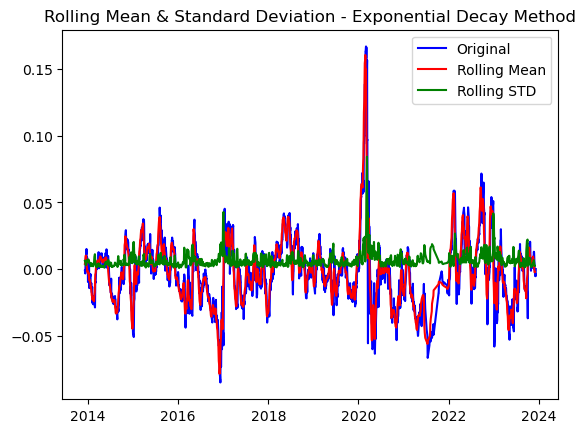

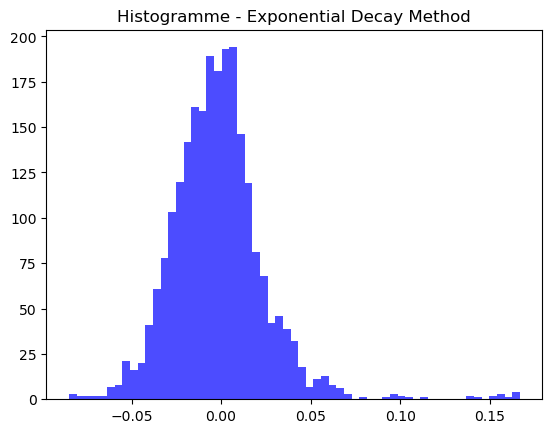

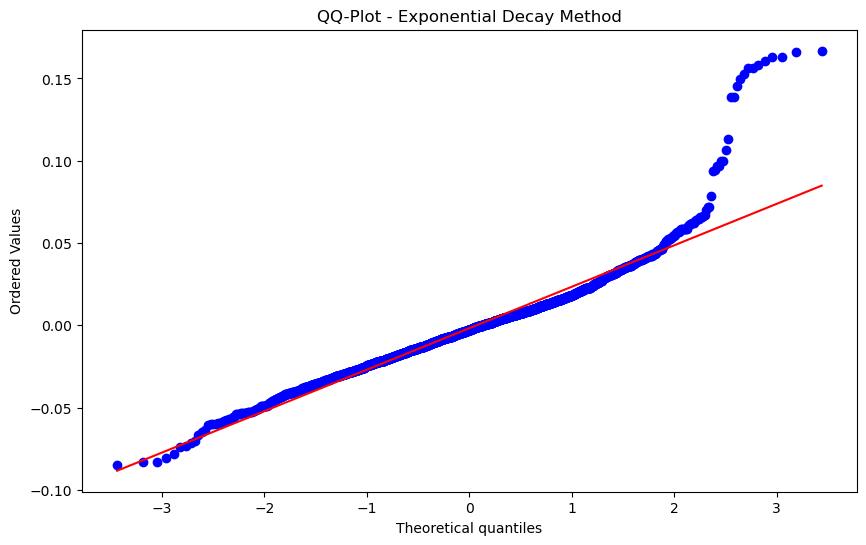

ADF Statistic (Exponential Decay Method): -6.951820201225872
p value (Exponential Decay Method): 9.649101745513922e-10
Critical Values:
	1%: -3.4331357265371256
	5%: -2.8627706846606245
	10%: -2.5674251469443186




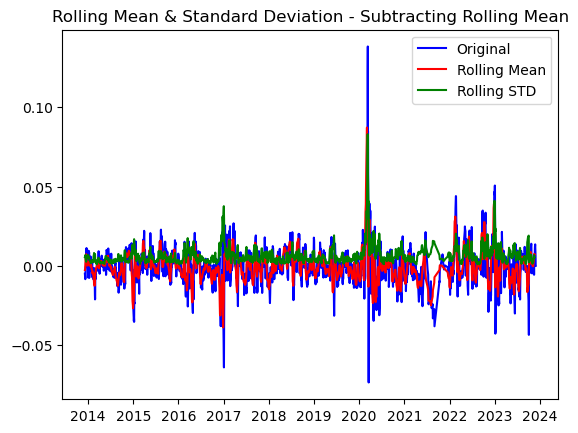

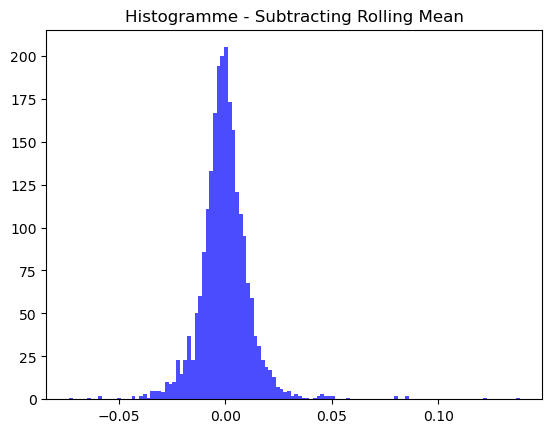

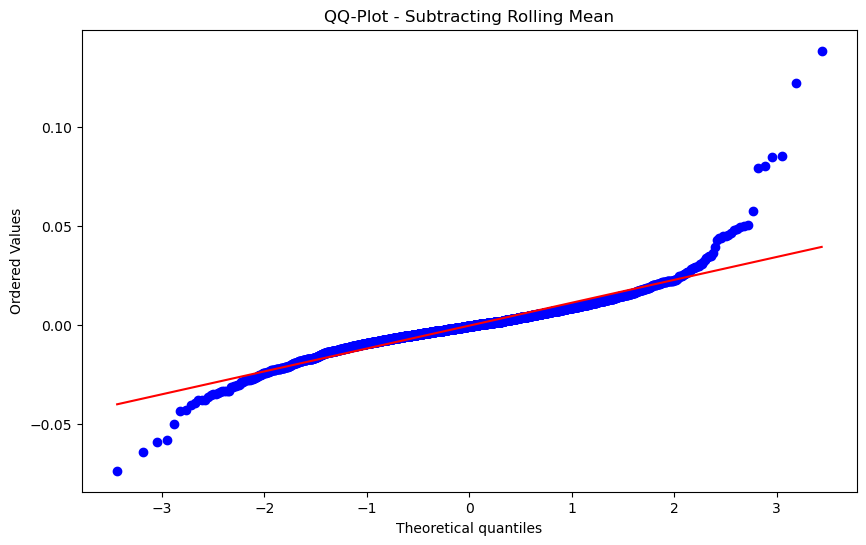

ADF Statistic (Subtracting Rolling Mean): -10.151321949869919
p value (Subtracting Rolling Mean): 7.937120625601674e-18
Critical Values:
	1%: -3.4331392912353604
	5%: -2.8627722587447804
	10%: -2.5674259850221723




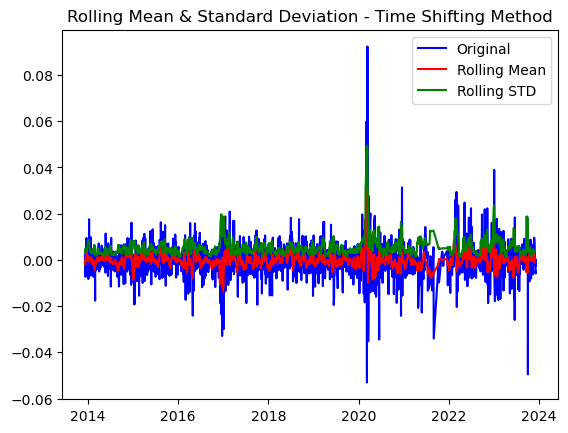

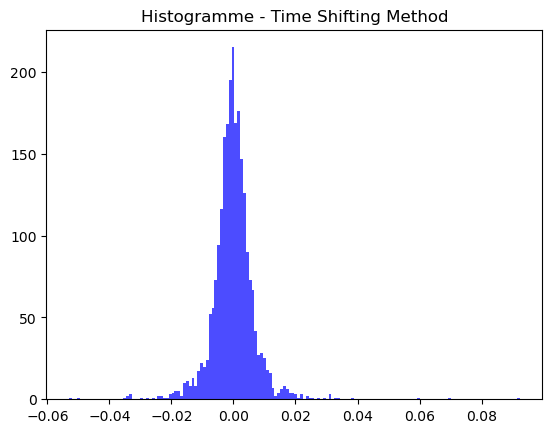

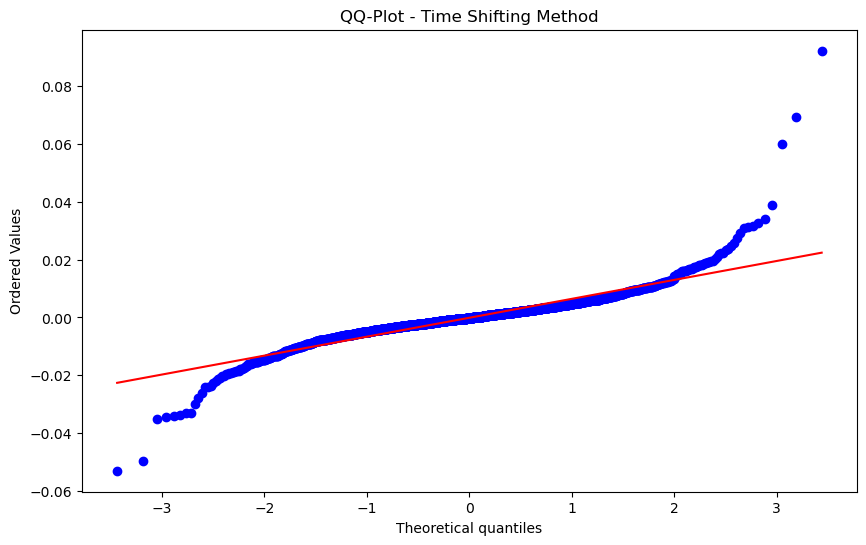

ADF Statistic (Time Shifting Method): -11.821123851759744
p value (Time Shifting Method): 8.409839278404556e-22
Critical Values:
	1%: -3.43313335512918
	5%: -2.8627696375034364
	10%: -2.567424589414422




In [31]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from scipy.stats import probplot

# Extraire la colonne 'Cous de cloture'
cous_de_cloture = df_modifie['Cous de cloture']

# Prendre le logarithme des données
df_log = np.log(cous_de_cloture)

# Fonction pour évaluer la stationnarité
def get_stationarity(timeseries, method_name):
    # Rolling statistics
    rolling_mean = timeseries.rolling(window=8).mean()
    rolling_std = timeseries.rolling(window=8).std()

    # Plot des statistiques roulantes
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='green', label='Rolling STD')
    plt.legend(loc='best')
    plt.title(f'Rolling Mean & Standard Deviation - {method_name}')
    plt.show(block=False)

    # Histogramme
    plt.hist(timeseries, bins='auto', color='blue', alpha=0.7)
    plt.title(f'Histogramme - {method_name}')
    plt.show()

    # QQ-plot
    plt.figure(figsize=(10, 6))
    probplot(timeseries, plot=plt)
    plt.title(f'QQ-Plot - {method_name}')
    plt.show()

    # Test de Dickey–Fuller
    result = adfuller(timeseries)
    print(f'ADF Statistic ({method_name}): {result[0]}')
    print(f'p value ({method_name}): {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    print('\n')

# Exponential decay method
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay, 'Exponential Decay Method')

# Subtracting the rolling mean
rolling_mean = df_log.rolling(window=8).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean, 'Subtracting Rolling Mean')

# The time shifting
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift, 'Time Shifting Method')


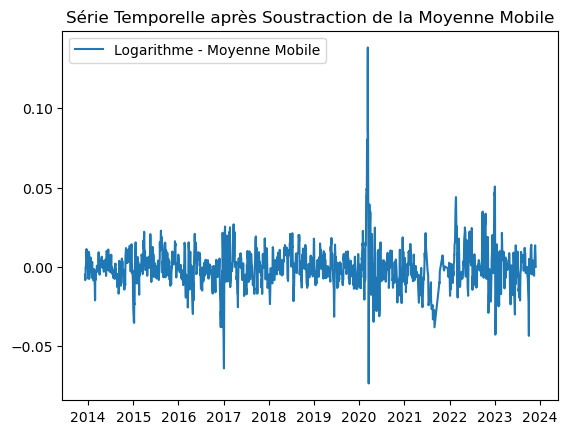

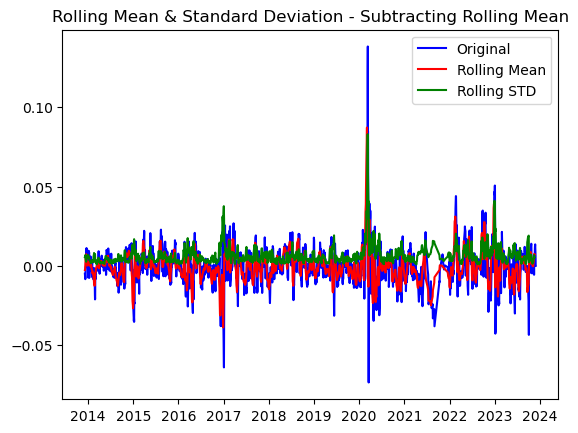

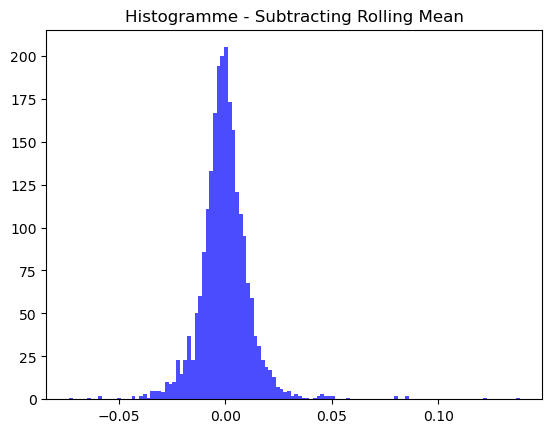

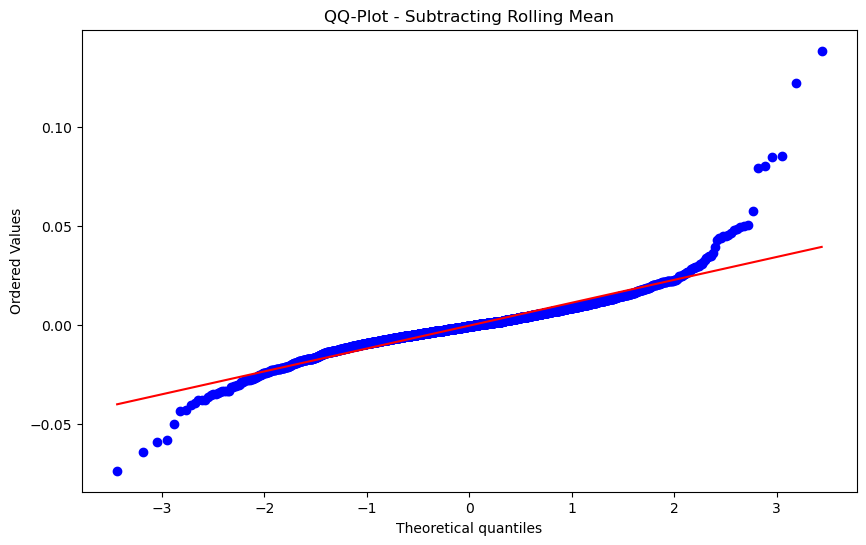

ADF Statistic (Subtracting Rolling Mean): -10.151321949869919
p value (Subtracting Rolling Mean): 7.937120625601674e-18
Critical Values:
	1%: -3.4331392912353604
	5%: -2.8627722587447804
	10%: -2.5674259850221723




In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from scipy.stats import probplot

# Fonction pour évaluer la stationnarité
def get_stationarity(timeseries, method_name):
    # Rolling statistics
    rolling_mean = timeseries.rolling(window=8).mean()
    rolling_std = timeseries.rolling(window=8).std()

    # Plot des statistiques roulantes
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='green', label='Rolling STD')
    plt.legend(loc='best')
    plt.title(f'Rolling Mean & Standard Deviation - {method_name}')
    plt.show(block=False)

    # Histogramme
    plt.hist(timeseries, bins='auto', color='blue', alpha=0.7)
    plt.title(f'Histogramme - {method_name}')
    plt.show()

    # QQ-plot
    plt.figure(figsize=(10, 6))
    probplot(timeseries, plot=plt)
    plt.title(f'QQ-Plot - {method_name}')
    plt.show()

    # Test de Dickey–Fuller
    result = adfuller(timeseries)
    print(f'ADF Statistic ({method_name}): {result[0]}')
    print(f'p value ({method_name}): {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    print('\n')

# Supposons que votre DataFrame est déjà chargé dans df_modifie
# Remplacez 'Cous de cloture' par le nom de votre colonne contenant les valeurs
cous_de_cloture = df_modifie['Cous de cloture']

# Prendre le logarithme des données
df_log = np.log(cous_de_cloture)

# Calculer la moyenne mobile
rolling_mean = df_log.rolling(window=8).mean()

# Soustraire la moyenne mobile des données originales
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)

# Visualiser la transformation
plt.plot(df_log_minus_mean, label='Logarithme - Moyenne Mobile')
plt.title('Série Temporelle après Soustraction de la Moyenne Mobile')
plt.legend()
plt.show()

# Évaluer la stationnarité après la transformation
get_stationarity(df_log_minus_mean, 'Subtracting Rolling Mean')


<Figure size 1200x600 with 0 Axes>

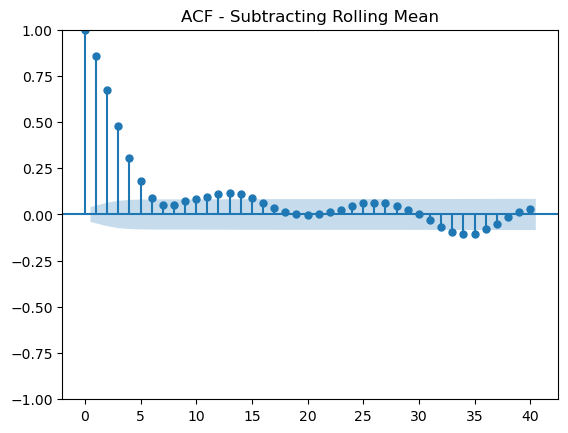

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

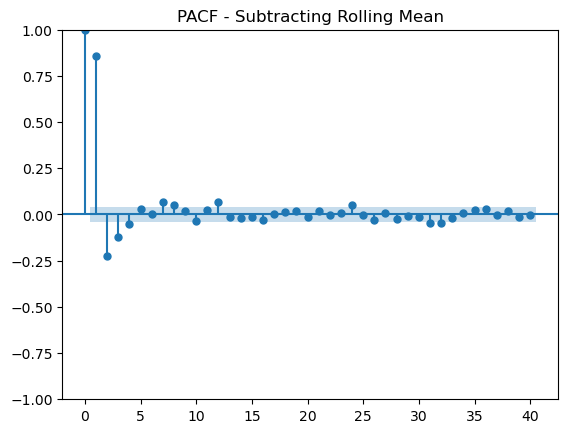

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # Assurez-vous d'avoir cette ligne



# Affichage de l'ACF (Autocorrelation Function)
plt.figure(figsize=(12, 6))
plot_acf(df_log_minus_mean, lags=40, title='ACF - Subtracting Rolling Mean')
plt.show()

# Affichage de la PACF (Partial Autocorrelation Function)
plt.figure(figsize=(12, 6))
plot_pacf(df_log_minus_mean, lags=40, title='PACF - Subtracting Rolling Mean')
plt.show()


In [54]:
# Afficher le nombre de lignes et de colonnes du DataFrame
num_rows, num_columns = df_modifie.shape
print(f"Nombre de lignes : {num_rows}")
print(f"Nombre de colonnes : {num_columns}")


Nombre de lignes : 2366
Nombre de colonnes : 1


In [55]:
# Afficher les noms des colonnes
nom_des_colonnes = df_modifie.columns
print("Noms des colonnes :", nom_des_colonnes)


Noms des colonnes : Index(['Cous de cloture'], dtype='object')


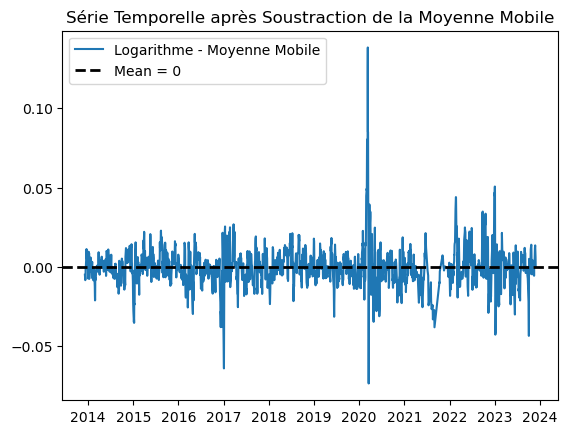

In [62]:
# Visualiser la série temporelle après la soustraction de la moyenne mobile
plt.plot(df_log_minus_mean, label='Logarithme - Moyenne Mobile')
plt.axhline(0, color='black', linestyle='--', linewidth=2, label='Mean = 0')  # Ajouter une ligne horizontale à y=0
plt.title('Série Temporelle après Soustraction de la Moyenne Mobile')
plt.legend()
plt.show()


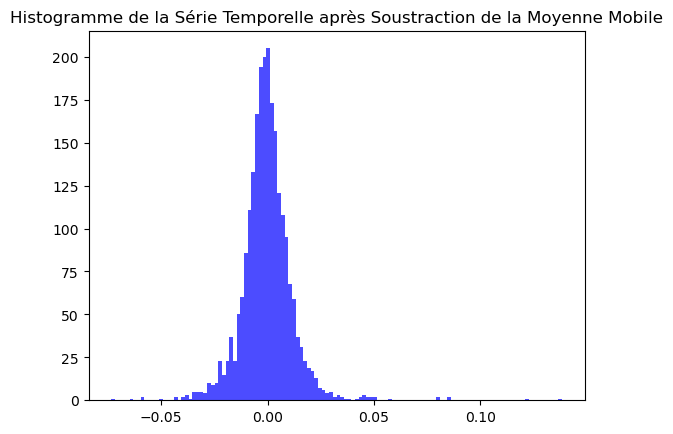

In [63]:
# Histogramme de la série temporelle transformée
plt.hist(df_log_minus_mean, bins='auto', color='blue', alpha=0.7)
plt.title('Histogramme de la Série Temporelle après Soustraction de la Moyenne Mobile')
plt.show()


In [74]:
df_log_minus_mean

Date 
2023-11-29    0.000040
2023-11-28    0.000427
2023-11-27    0.006060
2023-11-24    0.013520
2023-11-23    0.012784
                ...   
2013-12-12   -0.000742
2013-12-11   -0.007551
2013-12-10   -0.008216
2013-12-09   -0.008417
2013-12-06   -0.005015
Name: Cous de cloture, Length: 2359, dtype: float64

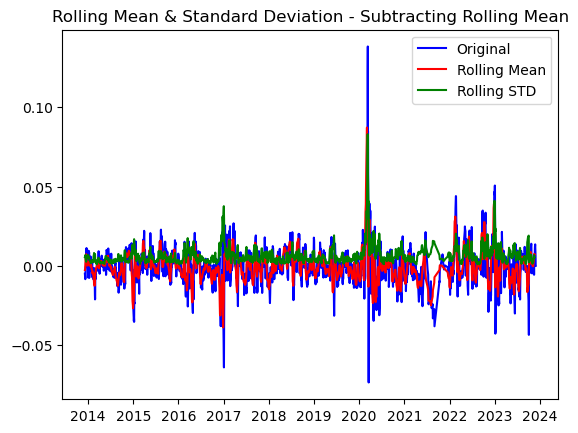

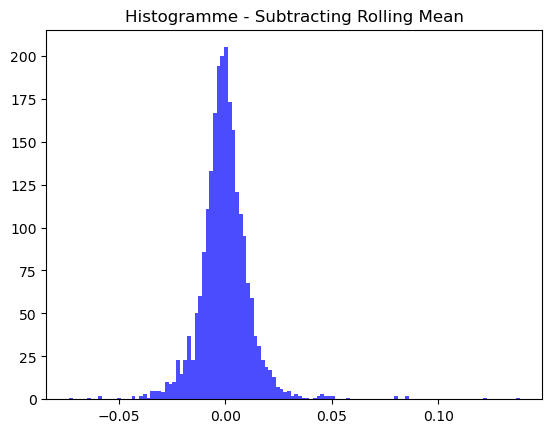

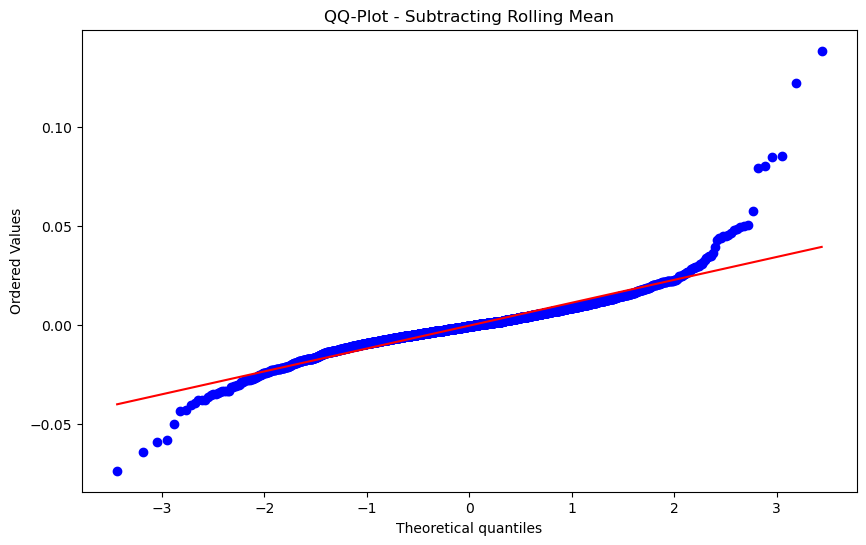

ADF Statistic (Subtracting Rolling Mean): -10.151321949869919
p value (Subtracting Rolling Mean): 7.937120625601674e-18
Critical Values:
	1%: -3.4331392912353604
	5%: -2.8627722587447804
	10%: -2.5674259850221723




In [78]:
# Évaluer la stationnarité après la transformation
get_stationarity(df_log_minus_mean, 'Subtracting Rolling Mean')

# Sauvegarder les valeurs transformées dans un fichier CSV avec leur indice
df_log_minus_mean.to_csv('valeurs_transformees.csv')